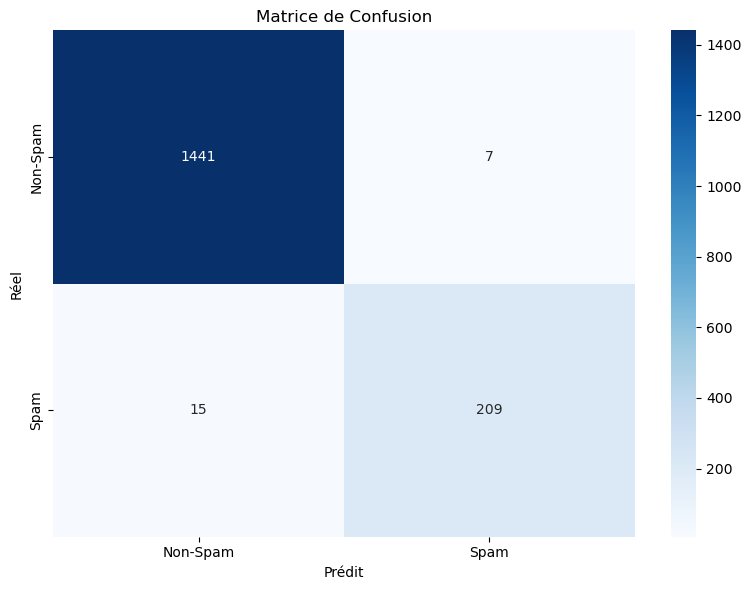

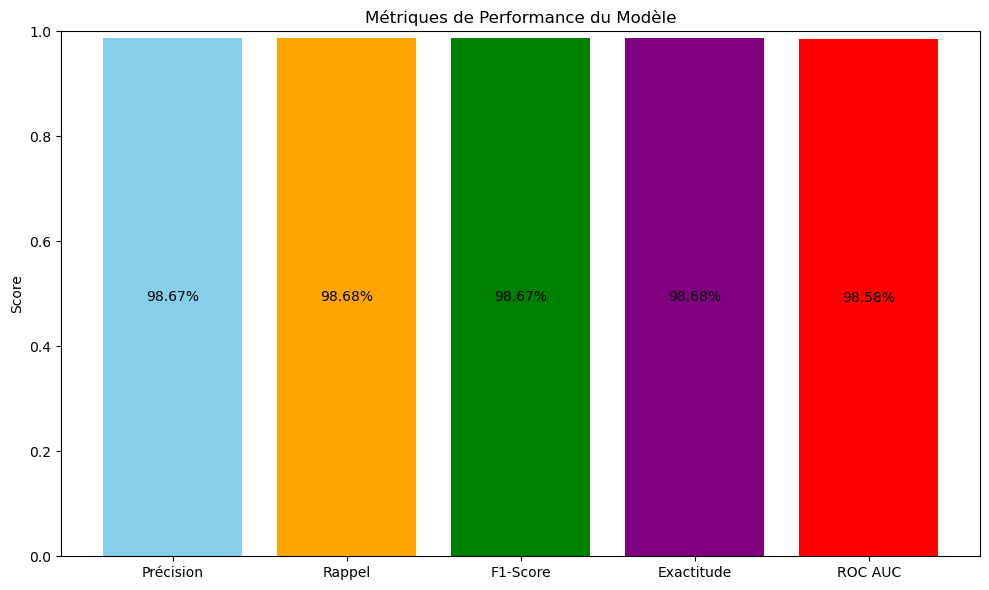

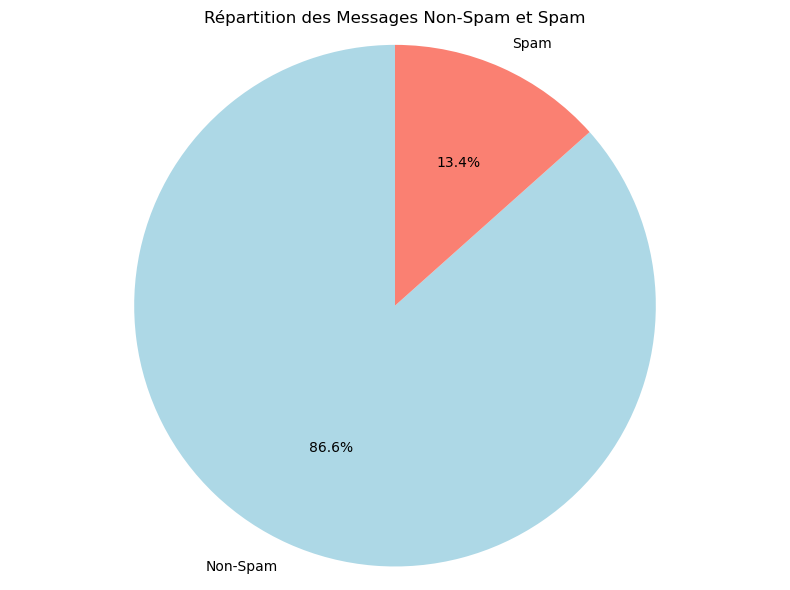

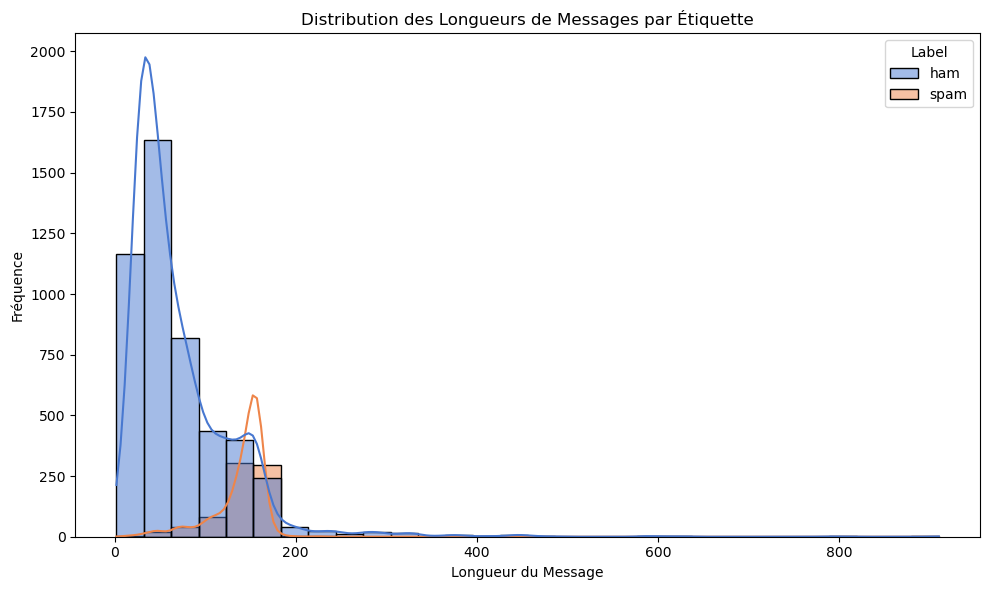

C:\Users\sbond\AppData\Local\Temp\ipykernel_28996\1060848728.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Label', y='Word_Count', palette='Set2')


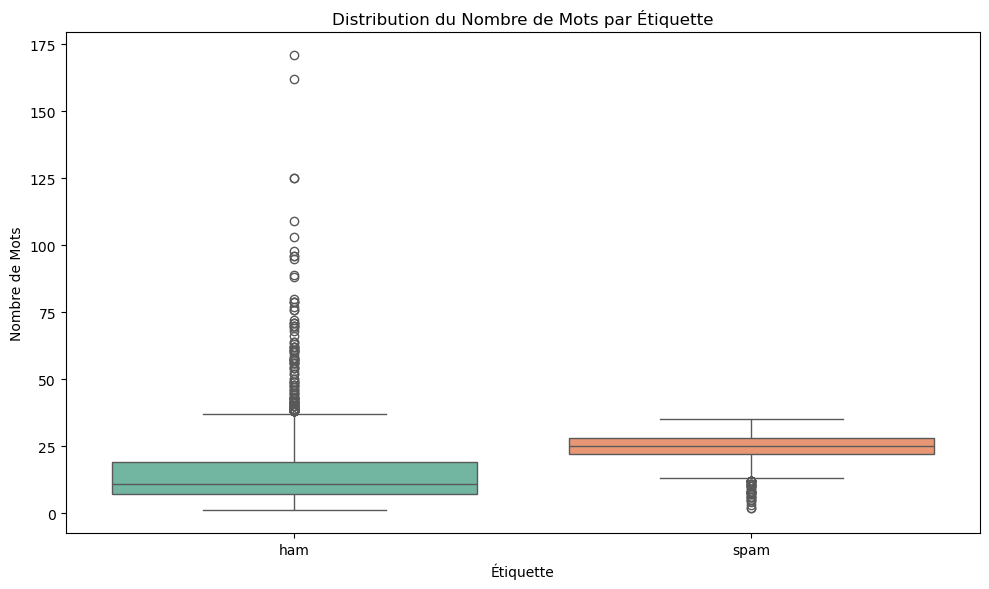

Fichiers générés:
- PDF: C:\Users\sbond\Desktop\spam_classifier_project\resultat analyse est visualisation\rapport_analyse.pdf
- Matrice de confusion: C:\Users\sbond\Desktop\spam_classifier_project\resultat analyse est visualisation\matrice_confusion.png
- Performances: C:\Users\sbond\Desktop\spam_classifier_project\resultat analyse est visualisation\performances.png
- Répartition des messages: C:\Users\sbond\Desktop\spam_classifier_project\resultat analyse est visualisation\repartition_messages.png
- Histogramme des longueurs de messages: C:\Users\sbond\Desktop\spam_classifier_project\resultat analyse est visualisation\longueur_messages.png
- Boxplot du nombre de mots: C:\Users\sbond\Desktop\spam_classifier_project\resultat analyse est visualisation\nombre_mots.png


In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

# Définir le chemin de sortie
output_dir = r"C:\Users\sbond\Desktop\spam_classifier_project\resultat analyse est visualisation"
os.makedirs(output_dir, exist_ok=True)

# Charger le dataset
dataset = pd.read_csv(r"C:\\Users\\sbond\\Desktop\\spam_classifier_project\\SMSSpamCollection.csv", sep='\t', header=None, names=['Label', 'Message'])

# Diviser les données
X = dataset['Message']
y = dataset['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Vectoriser les textes
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Entraîner le modèle
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

# Faire des prédictions
y_pred = classifier.predict(X_test_vect)
y_prob = classifier.predict_proba(X_test_vect)[:, 1]

# Générer le rapport de classification et la matrice de confusion
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculer des métriques supplémentaires
roc_auc = roc_auc_score(y_test.map({'ham': 0, 'spam': 1}), y_prob)
accuracy = accuracy_score(y_test, y_pred)

# Créer un PDF pour inclure tous les visuels
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.tight_layout()
conf_matrix_path = os.path.join(output_dir, 'matrice_confusion.png')
plt.savefig(conf_matrix_path)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Matrice de Confusion", ln=True, align='L')
pdf.image(conf_matrix_path, x=10, y=30, w=190)
plt.show()
plt.close()

# Visualiser les performances globales
metrics = {"Précision": report['weighted avg']['precision'],
           "Rappel": report['weighted avg']['recall'],
           "F1-Score": report['weighted avg']['f1-score'],
           "Exactitude": accuracy,
           "ROC AUC": roc_auc}
plt.figure(figsize=(10, 6))
bar = plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'orange', 'green', 'purple', 'red'])
for rect, value in zip(bar, metrics.values()):
    plt.text(rect.get_x() + rect.get_width() / 2, rect.get_height() / 2, f"{value:.2%}", ha='center', va='center', color='black')
plt.title('Métriques de Performance du Modèle')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.tight_layout()
performance_path = os.path.join(output_dir, 'performances.png')
plt.savefig(performance_path)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Métriques de Performance", ln=True, align='L')
pdf.image(performance_path, x=10, y=30, w=190)
plt.show()
plt.close()

# Statistiques du dataset
labels = ['Non-Spam', 'Spam']
sizes = [sum(dataset['Label'] == 'ham'), sum(dataset['Label'] == 'spam')]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Répartition des Messages Non-Spam et Spam')
plt.axis('equal')
plt.tight_layout()
pie_chart_path = os.path.join(output_dir, 'repartition_messages.png')
plt.savefig(pie_chart_path)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Répartition des Messages", ln=True, align='L')
pdf.image(pie_chart_path, x=10, y=30, w=190)
plt.show()
plt.close()

# Visualiser les données numériques
# Longueur des messages
dataset['Message_Length'] = dataset['Message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Message_Length', hue='Label', kde=True, bins=30, palette='muted')
plt.title('Distribution des Longueurs de Messages par Étiquette')
plt.xlabel('Longueur du Message')
plt.ylabel('Fréquence')
plt.tight_layout()
histogram_path = os.path.join(output_dir, 'longueur_messages.png')
plt.savefig(histogram_path)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Distribution des Longueurs de Messages", ln=True, align='L')
pdf.image(histogram_path, x=10, y=30, w=190)
plt.show()
plt.close()

# Nombre de mots par message
dataset['Word_Count'] = dataset['Message'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Label', y='Word_Count', palette='Set2')
plt.title('Distribution du Nombre de Mots par Étiquette')
plt.xlabel('Étiquette')
plt.ylabel('Nombre de Mots')
plt.tight_layout()
boxplot_path = os.path.join(output_dir, 'nombre_mots.png')
plt.savefig(boxplot_path)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Distribution du Nombre de Mots", ln=True, align='L')
pdf.image(boxplot_path, x=10, y=30, w=190)
plt.show()
plt.close()

# Exporter le rapport en PDF
pdf_path = os.path.join(output_dir, 'rapport_analyse.pdf')
pdf.output(pdf_path)

print("Fichiers générés:")
print(f"- PDF: {pdf_path}")
print(f"- Matrice de confusion: {conf_matrix_path}")
print(f"- Performances: {performance_path}")
print(f"- Répartition des messages: {pie_chart_path}")
print(f"- Histogramme des longueurs de messages: {histogram_path}")
print(f"- Boxplot du nombre de mots: {boxplot_path}")
